# XgBoost Hyperparameters_v1


In [35]:
# Generic Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  RobustScaler
import numpy as np

In [ ]:
from sklearn.model_selection import cross_val_score 
from xgboost import XGBClassifier
import xgboost as xgb

# Metric Libraries
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,fbeta_score, confusion_matrix

In [ ]:
# Load dataset.
df = pd.read_csv('creditcard.csv')
df = df.drop("Time", axis = 1)

y= df["Class"]
X = df.drop("Class", axis = 1)
y.shape,X.shape

In [ ]:
# Separation of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# Check dataset composition

print(" Fraudulent Count for Full data :  ",np.sum(y))
print(" Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data :   ",np.sum(y_test))

In [ ]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = RobustScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

# 1.- Data Transformation

## Original Dataset

### Smote

In [8]:
# Import of specific libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


### Adasyn

In [9]:
# Import of specific libraries
from imblearn.over_sampling import ADASYN

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({1: 227458, 0: 227451})


In [10]:
# LOAD OF MODELS.
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

## Power Transformation

### Original

In [11]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn import metrics 
from sklearn import preprocessing


from sklearn.preprocessing import PowerTransformer

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

### Smote

In [12]:
# Import of specific libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Initial situation
print('Original dataset shape %s' % Counter(y_train_pt))

# Calculate OverSampling model
smote = SMOTE(random_state=42)
X_train_smote_pt, y_train_smote_pt = smote.fit_resample(X_train_pt, y_train_pt)

print('Resampled dataset shape %s' % Counter(y_train_smote_pt))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


### Adasyn

In [13]:
# Import of specific libraries
from imblearn.over_sampling import ADASYN

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
adasyn = ADASYN(random_state=42)
X_train_adasyn_pt, y_train_adasyn_pt = adasyn.fit_resample(X_train_pt, y_train_pt)

print('Resampled dataset shape %s' % Counter(y_train_adasyn_pt))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({1: 227459, 0: 227451})


In [14]:
# Original distribution
OR_origin = ['OR origin',X_train, y_train, X_test, y_test]
OR_smote = ['OR smote',X_train_smote, y_train_smote, X_test, y_test]
OR_adasyn = ['OR adasyn', X_train_adasyn, y_train_adasyn, X_test, y_test]

# Power Transformation
PT_origin = ['PT origin',X_train_pt, y_train_pt, X_test_pt, y_test_pt]
PT_smote = ['PT smote',X_train_smote_pt, y_train_smote_pt, X_test_pt, y_test_pt ]
PT_adasyn = ['PT adasyn', X_train_adasyn_pt, y_train_adasyn_pt, X_test_pt, y_test_pt]

## Preparacion carga de modelos: librerias y funciones

In [15]:
# LOAD OF MODELS.
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [17]:
def evaluate_xgboost(data_list, params_to_show=None, threshold=0.5, **xgb_params):
    '''
    This function trains an XGBoost model and evaluates it with a custom classification threshold.
    
    Parameters:
        - data_list: List containing [name, X_train, y_train, X_val, y_val].
        - params_to_show: Dictionary with parameters to display (optional).
        - threshold: The classification threshold (default = 0.3).
        - **xgb_params: Additional XGBoost parameters to be passed dynamically.
    
    Return:
        - A DataFrame with evaluation metrics (Accuracy, Precision, Recall, F1, F2, ROC-AUC, Confusion Matrix).
    '''
    # Diccionario de abreviaturas
    param_abbreviations = {
        'n_estimators': 'n_est',
        'learning_rate': 'lr',
        'max_depth': 'md',
        'threshold': 'th'
    }
    
    # Unpack the data list
    name = data_list[0]
    X_train, y_train, X_val, y_val = data_list[1:]
    
    # Define the XGBoost model, passing **xgb_params dynamically
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **xgb_params  # Pass dynamic parameters here
    )
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = xgb_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class (fraud)
    
    # Adjust predictions based on the threshold
    y_pred = (y_prob > threshold).astype(int)
    
    # Calculate metrics
    cm = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)  # Use probabilities to calculate ROC-AUC
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    
    # Create a string with the parameters to show
    # If params_to_show is not provided, show all XGBoost parameters used
    if params_to_show is None:
        params_to_show = {'threshold': threshold}
        params_to_show.update(xgb_params)  # Add dynamic XGBoost params to show
    
    # Create abrevs
    params_with_abbreviations = {
        param_abbreviations.get(key, key): value for key, value in params_to_show.items()
    }
    
    # Build the parameter string dynamically
    #params_str = " ".join([f"{key}={value}" for key, value in params_with_abbreviations.items()])
    params_str =[f"{key}={value}" for key, value in params_with_abbreviations.items()]
    # Store the results in a DataFrame
    results_df = pd.DataFrame({
        'Model': ['xgboost'],
        'Description': [data_list[0]],
        'Parameter': [params_str],  # Show abbreviated parameters here
        'ROC-AUC': [roc_auc],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'F2 Score': [f2],
        'Confusion Matrix': [cm]
    })

    # Adjust cells
    pd.set_option('display.max_colwidth', None)
    
    results_df.style.set_properties(**{'white-space': 'pre-wrap'})
    
    return results_df


In [18]:
# Parámeters for XGBoost
valores_learning_rate = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Values to test
valores_n_estimators = [100, 200, 300, 400]   # Other parámeters to test
valores_max_depth = [3, 5, 7]          # Test different depths

total_results = []

# Iterate over parameters to do combined testing
for learning_rate in valores_learning_rate:
    for n_estimators in valores_n_estimators:
        for max_depth in valores_max_depth:
            # Execute the function with different combinations of hyperparameters
            results = evaluate_xgboost(
                OR_smote,
                n_estimators=n_estimators,
                learning_rate=learning_rate,
                max_depth=max_depth
            )
            total_results.append(results)

# Combine all results into a single DataFrame for visualization
total_results_df = pd.concat(total_results, ignore_index=True)

In [19]:
total_results_df

,Model,Description,Parameter,ROC-AUC,Accuracy,Precision,Recall,F1 Score,F2 Score,Confusion Matrix
0,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.1, md=3]",0.979254,0.987887,0.114583,0.897959,0.203233,0.379310,"[[56184, 680], [10, 88]]"
1,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.1, md=5]",0.975342,0.994488,0.223077,0.887755,0.356557,0.556266,"[[56561, 303], [11, 87]]"
2,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.1, md=7]",0.974616,0.997858,0.439394,0.887755,0.587838,0.737288,"[[56753, 111], [11, 87]]"
3,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.1, md=3]",0.981061,0.992732,0.180162,0.908163,0.300676,0.502257,"[[56459, 405], [9, 89]]"
4,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.1, md=5]",0.976641,0.998122,0.474860,0.867347,0.613718,0.744308,"[[56770, 94], [13, 85]]"
...,...,...,...,...,...,...,...,...,...,...
91,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.8, md=5]",0.977811,0.999403,0.813725,0.846939,0.830000,0.840081,"[[56845, 19], [15, 83]]"
92,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.8, md=7]",0.980583,0.999315,0.780952,0.836735,0.807882,0.824950,"[[56841, 23], [16, 82]]"
93,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.8, md=3]",0.981377,0.999368,0.798077,0.846939,0.821782,0.836694,"[[56843, 21], [15, 83]]"
94,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.8, md=5]",0.977513,0.999403,0.813725,0.846939,0.830000,0.840081,"[[56845, 19], [15, 83]]"


In [20]:
total_results_df_sorted = total_results_df.sort_values(by='F2 Score', ascending=False)

In [21]:
total_results_df_sorted

,Model,Description,Parameter,ROC-AUC,Accuracy,Precision,Recall,F1 Score,F2 Score,Confusion Matrix
29,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.3, md=7]",0.982876,0.999473,0.826923,0.877551,0.851485,0.866935,"[[56846, 18], [12, 86]]"
8,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.1, md=7]",0.978151,0.999438,0.811321,0.877551,0.843137,0.863454,"[[56844, 20], [12, 86]]"
32,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.3, md=7]",0.982525,0.999473,0.833333,0.867347,0.850000,0.860324,"[[56847, 17], [13, 85]]"
35,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.3, md=7]",0.982234,0.999473,0.833333,0.867347,0.850000,0.860324,"[[56847, 17], [13, 85]]"
26,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.3, md=7]",0.984193,0.999368,0.781818,0.877551,0.826923,0.856574,"[[56840, 24], [12, 86]]"
...,...,...,...,...,...,...,...,...,...,...
24,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.3, md=3]",0.980315,0.994768,0.234043,0.897959,0.371308,0.572917,"[[56576, 288], [10, 88]]"
1,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.1, md=5]",0.975342,0.994488,0.223077,0.887755,0.356557,0.556266,"[[56561, 303], [11, 87]]"
3,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.1, md=3]",0.981061,0.992732,0.180162,0.908163,0.300676,0.502257,"[[56459, 405], [9, 89]]"
12,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.2, md=3]",0.979167,0.992223,0.167630,0.887755,0.282010,0.477497,"[[56432, 432], [11, 87]]"


In [22]:
total_results_df_sorted_filtered =  total_results_df_sorted[total_results_df_sorted['F2 Score'] >=.85].reset_index(drop=True)

In [23]:
total_results_df_sorted_filtered 

,Model,Description,Parameter,ROC-AUC,Accuracy,Precision,Recall,F1 Score,F2 Score,Confusion Matrix
0,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.3, md=7]",0.982876,0.999473,0.826923,0.877551,0.851485,0.866935,"[[56846, 18], [12, 86]]"
1,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.1, md=7]",0.978151,0.999438,0.811321,0.877551,0.843137,0.863454,"[[56844, 20], [12, 86]]"
2,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.3, md=7]",0.982525,0.999473,0.833333,0.867347,0.850000,0.860324,"[[56847, 17], [13, 85]]"
3,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.3, md=7]",0.982234,0.999473,0.833333,0.867347,0.850000,0.860324,"[[56847, 17], [13, 85]]"
4,xgboost,OR smote,"[th=0.5, n_est=100, lr=0.3, md=7]",0.984193,0.999368,0.781818,0.877551,0.826923,0.856574,"[[56840, 24], [12, 86]]"
5,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.2, md=7]",0.980716,0.999421,0.809524,0.867347,0.837438,0.855131,"[[56844, 20], [13, 85]]"
6,xgboost,OR smote,"[th=0.5, n_est=300, lr=0.2, md=5]",0.980318,0.999350,0.774775,0.877551,0.822967,0.854871,"[[56839, 25], [12, 86]]"
7,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.2, md=7]",0.980555,0.999403,0.801887,0.867347,0.833333,0.853414,"[[56843, 21], [13, 85]]"
8,xgboost,OR smote,"[th=0.5, n_est=200, lr=0.2, md=7]",0.981136,0.999386,0.794393,0.867347,0.829268,0.851703,"[[56842, 22], [13, 85]]"
9,xgboost,OR smote,"[th=0.5, n_est=400, lr=0.6, md=7]",0.982320,0.999438,0.823529,0.857143,0.840000,0.850202,"[[56846, 18], [14, 84]]"


In [24]:
xgboost_hyperparameters= total_results_df_sorted_filtered 

In [25]:
def evaluate_xgboost_simplified(data_list, threshold=0.5, **xgb_params):
    '''
    This function trains an XGBoost model and evaluates it with a custom classification threshold.
    
    Parameters:
        - data_list: List containing [name, X_train, y_train, X_val, y_val].
        - threshold: The classification threshold (default = 0.5).
        - **xgb_params: Additional XGBoost parameters to be passed dynamically.
    
    Return:
        - A DataFrame with evaluation metrics (Accuracy, Precision, Recall, F1, F2, ROC-AUC, Confusion Matrix).
        - The trained XGBoost model (to use for visualizations).
    '''
    # Unpack the data list
    name = data_list[0]
    X_train, y_train, X_val, y_val = data_list[1:]
    
    # Define the XGBoost model, passing **xgb_params dynamically
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **xgb_params  # Pass dynamic parameters here
    )
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = xgb_model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class
    
    # Adjust predictions based on the threshold
    y_pred = (y_prob > threshold).astype(int)
    
    # Calculate metrics
    cm = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    
    # Store the results in a DataFrame
    results_df = pd.DataFrame({
        'Model': ['XGBoost'],
        'Description': [name],
        'ROC-AUC': [roc_auc],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'F2 Score': [f2],
        'Confusion Matrix': [cm]
    })
    
    return results_df, xgb_model

In [26]:
# Final Solution
xgboost_final, xgb_model = evaluate_xgboost_simplified(
    OR_smote,
    n_estimators=200,
    learning_rate=0.3,
    max_depth=7
)

In [27]:
xgboost_final

,Model,Description,ROC-AUC,Accuracy,Precision,Recall,F1 Score,F2 Score,Confusion Matrix
0,XGBoost,OR smote,0.982876,0.999473,0.826923,0.877551,0.851485,0.866935,"[[56846, 18], [12, 86]]"


In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from xgboost import XGBClassifier, plot_importance, plot_tree
import pandas as pd
import numpy as np

def evaluate_and_visualize_xgboost(data_list, threshold=0.5, **xgb_params):
    # Dict of abrevs
    param_abbreviations = {
        'n_estimators': 'n_est',
        'learning_rate': 'lr',
        'max_depth': 'md',
        'threshold': 'th'
    }

    # Unpack data
    name, X_train, y_train, X_val, y_val = data_list

    # Define XgBoost model
    xgb_model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **xgb_params
    )

    # Train model
    xgb_model.fit(X_train, y_train)

    # Predict probabilities
    y_prob = xgb_model.predict_proba(X_val)[:, 1]

    # Adjuct predictions over thresold
    y_pred = (y_prob > threshold).astype(int)

    # Calculate metrics
    cm = confusion_matrix(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    f2 = fbeta_score(y_val, y_pred, beta=2)
    
    # Save resulta in dataframe
    results_df = pd.DataFrame({
        'Model': ['xgboost'],
        'Description': [name],
        'ROC-AUC': [roc_auc],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'F2 Score': [f2],
        'Confusion Matrix': [cm]
    })

    # Function plot matrix confusion
    def plot_confusion_matrix(cm):
        plt.figure(figsize=(5, 5))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ['0', '1'])
        plt.yticks(tick_marks, ['0', '1'])

        # Label in every cell
        thresh = cm.max() / 2.
        for i, j in np.ndindex(cm.shape):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    # Funtion to graph ROC-AUC
    def plot_roc_curve(y_val, y_prob):
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.show()
        
    # Function to graph characteristics weight
    def plot_feature_importance(model):
        plt.figure(figsize=(10, 8))
        plot_importance(model, max_num_features=10, importance_type='weight')
        plt.title('Feature Importance')
        plt.show()

    # Function to graph decision tree
    def plot_xgboost_tree(model, num_tree=0):
        plt.figure(figsize=(20, 10))
        plot_tree(model, num_trees=num_tree)
        plt.show()

    # Call visualization functions
    plot_roc_curve(y_val, y_prob)
    plot_confusion_matrix(cm)
    plot_feature_importance(xgb_model)
    plot_xgboost_tree(xgb_model, num_tree=0)

    return results_df

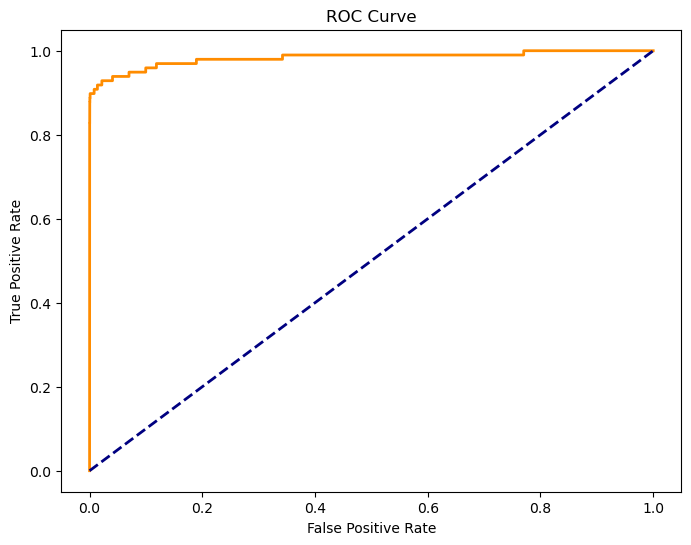

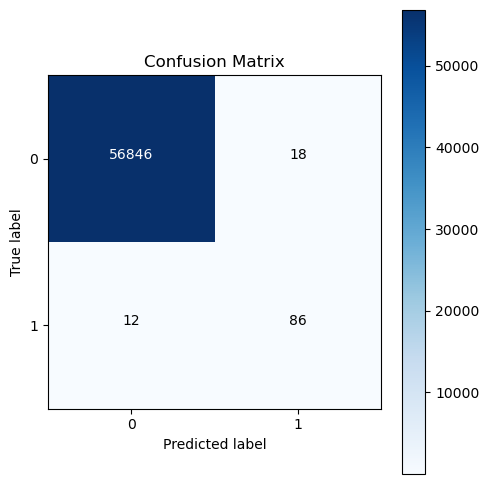

<Figure size 1000x800 with 0 Axes>

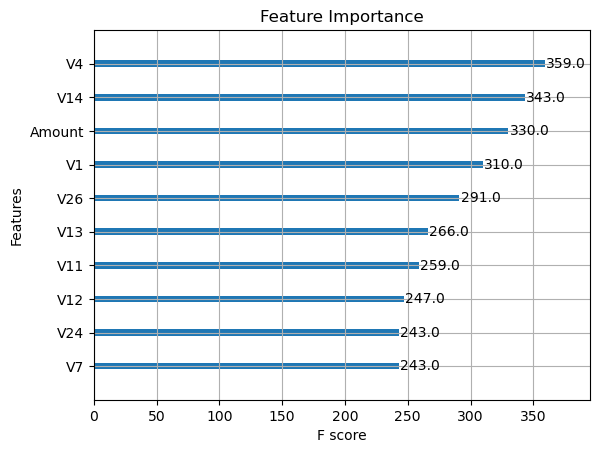

<Figure size 2000x1000 with 0 Axes>

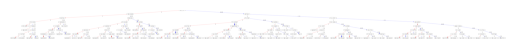

,Model,Description,ROC-AUC,Accuracy,Precision,Recall,F1 Score,F2 Score,Confusion Matrix
0,xgboost,OR smote,0.982876,0.999473,0.826923,0.877551,0.851485,0.866935,"[[56846, 18], [12, 86]]"


In [31]:
# Execuate function with single parameter config
final_model = evaluate_and_visualize_xgboost(
     OR_smote,
    n_estimators=200,
    learning_rate=0.3,
    max_depth=7
)

# Show results
final_model

In [33]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

def save_xgboost_tree(model, num_tree=0, filename='xgboost_tree_high_resolution.png', figsize=(30, 20), dpi=300):
    """
    
    Function to save Xgboost´s tree with high resolution

    Args:
        model: XgBoost trained model
        num_tree: Number of tree to visualizate
        filename: Name of file where image is saved.
        figsize: Figure size (wide, high)
        dpi: Resolution of image.
    """
    plt.figure(figsize=figsize)
    plot_tree(model, num_trees=num_tree, fontsize=10)
    
    # Save graph in PNG format with desired resolution
    plt.savefig(filename, dpi=dpi, bbox_inches='tight')
    plt.close()  # Cerrar la figura para liberar memoria
    
# Call function to save the tree
save_xgboost_tree(xgb_model, num_tree=0, filename='xgboost_tree_high_resolution.png')


<Figure size 3000x2000 with 0 Axes>

In [34]:
import xgboost as xgb

# Train model
xgb_model = xgb.XGBClassifier(n_estimators=400, learning_rate=0.2, max_depth=5)
xgb_model.fit(X_train, y_train)

# Call function to save the tree
save_xgboost_tree(xgb_model, num_tree=0, filename='xgboost_tree_high_resolution.png')


<Figure size 3000x2000 with 0 Axes>

In [30]:
xgboost_hyperparameters.to_csv(r'C:\TFM\06_hyperparameter\xgboost.csv', index=False)